Created on Tuesday July 30, 2024
@Author: Samuel Mintah Ayim

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pandas as pd
import matplotlib.animation as animation
import numpy as np
from scipy.interpolate import griddata
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import matplotlib.dates as mdates
import matplotlib as mpl
import re
from itertools import chain
import matplotlib
import matplotlib.ticker as ticker
import scipy.io
from statsmodels.nonparametric.smoothers_lowess import lowess
import gsw
from scipy.stats import pearsonr
from matplotlib.pyplot import cm
from cartopy import config
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotx
from cycler import cycler
from matplotlib.dates import date2num
import cartopy.feature as cfeature  #adding features in the map
#import gpxpy
import xml.etree.ElementTree as ET
import plotly.graph_objs as go

In [2]:
os.chdir('C:/Users/piago/Documents/Uni/5_Semester/Hiwi')

# Get the CSV file path from the command line argument
#csv_file = 'C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/MATLAB/HE_644/FinalTables/20240717_G01_00.00_Halobates.csv'
csv_file = "C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Data/Halobates_G08_16.03_final.xlsx"


# Read the Excel file
#df = pd.read_csv(csv_file)
df = pd.read_excel(csv_file, skiprows=8)
df = df.set_index('Date_Time')
df.index = pd.to_datetime(df.index)
#df=df['2024-07-24-06:35:00':'2024-07-24-06:45:00']

In [18]:
#df.CTD_Sal_abs_60cm
df.head()
df=df.dropna(how='all', subset=df.columns)
df.head()

Event_label   Latitude  Longitude  RECORD  \
Date_Time                                                        
2023-03-09 07:28:00  HE614_16-03  54.878333   7.126683   42518   
2023-03-09 07:28:10  HE614_16-03  54.878333   7.126700   42519   
2023-03-09 07:28:20  HE614_16-03  54.878167   7.126717   42520   
2023-03-09 07:28:30  HE614_16-03  54.878000   7.126750   42521   
2023-03-09 07:28:40  HE614_16-03  54.878000   7.126833   42522   

                     Campbell_Barometric_Pressure  Campbell_Relative_Humidity  \
Date_Time                                                                       
2023-03-09 07:28:00                         997.3                          61   
2023-03-09 07:28:10                         997.4                          63   
2023-03-09 07:28:20                         997.4                          63   
2023-03-09 07:28:30                         997.4                          63   
2023-03-09 07:28:40                         997.4                          63   

                     Campbell_Air_Temperature  Campbell_Dew_Point  \
Date_Time                                                           
2023-03-09 07:28:00                       3.2                -3.3   
2023-03-09 07:28:10                       3.1                -3.1   
2023-03-09 07:28:20                       3.1                -3.1   
2023-03-09 07:28:30                       3.1                -3.1   
2023-03-09 07:28:40                       3.2                -3.1   

                     Campbell_WindSpeed  Campbell_Wind_Direction_True  ...  \
Date_Time                                                              ...   
2023-03-09 07:28:00                4.83                           122  ...   
2023-03-09 07:28:10                3.57                           124  ...   
2023-03-09 07:28:20                3.57                           124  ...   
2023-03-09 07:28:30                3.57                           124  ...   
2023-03-09 07:28:40                3.84                           117  ...   

                     Quality_Thies_Temperature_3_AVG  \
Date_Time                                              
2023-03-09 07:28:00                              NaN   
2023-03-09 07:28:10                              NaN   
2023-03-09 07:28:20                              NaN   
2023-03-09 07:28:30                              NaN   
2023-03-09 07:28:40                              NaN   

                     Quality_Thies_Temperature_4_AVG  \
Date_Time                                              
2023-03-09 07:28:00                              NaN   
2023-03-09 07:28:10                              NaN   
2023-03-09 07:28:20                              NaN   
2023-03-09 07:28:30                              NaN   
2023-03-09 07:28:40                              NaN   

                     Quality_Thies_Temperature_5_AVG  \
Date_Time                                              
2023-03-09 07:28:00                              NaN   
2023-03-09 07:28:10                              NaN   
2023-03-09 07:28:20                              NaN   
2023-03-09 07:28:30                              NaN   
2023-03-09 07:28:40                              NaN   

                     Quality_Thies_Temperature_CUS_AVG  \
Date_Time                                                
2023-03-09 07:28:00                                NaN   
2023-03-09 07:28:10                                NaN   
2023-03-09 07:28:20                                NaN   
2023-03-09 07:28:30                                NaN   
2023-03-09 07:28:40                                NaN   

                     Quality_Thies_Relative_Humidity_2_AVG  \
Date_Time                                                    
2023-03-09 07:28:00                                    NaN   
2023-03-09 07:28:10                                    NaN   
2023-03-09 07:28:20                                    NaN   
2023-03-09 07:28:30                                    NaN   
2

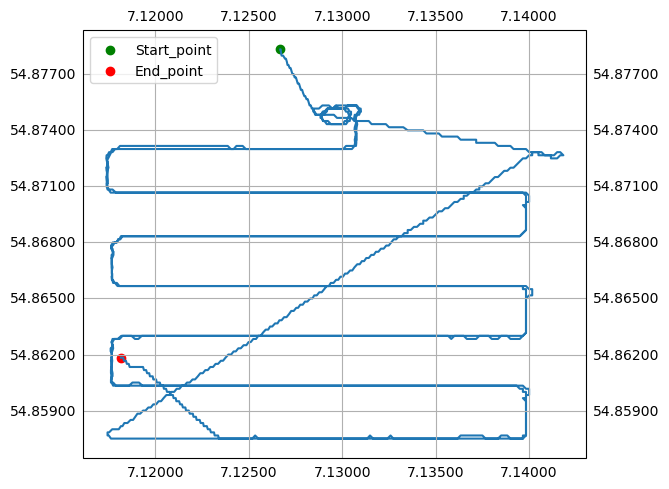

In [9]:

track2_lons = df.Longitude
track2_lats = df.Latitude
import matplotlib.ticker as mticker


# Define the format for x and y-axis ticks
formatter = mticker.FuncFormatter(lambda x, _: '{:.2f}'.format(x))

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

#extent = [min(track2_lons-0.01),
 #        max(track2_lons+0.01),
  #      min(track2_lats-0.01),
   #    max(track2_lats+0.01)]


#ax.set_extent(extent, crs=ccrs.PlateCarree())  # Set the extent of the plot

ax.plot(track2_lons, track2_lats)
plt.scatter(df.Longitude[0],df.Latitude[0], color = 'green', label = 'Start_point')
plt.scatter(df.Longitude[-1],df.Latitude[-1], color = 'red', label = 'End_point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#ax.add_feature(cfeature.LAND, facecolor='lightgray') 
#ax.add_feature(cfeature.OCEAN, facecolor='lightblue') 

# Show gridlines
gl = ax.gridlines(draw_labels=True)

# Set tick formatter for x and y-axis
gl.xformatter = mticker.FormatStrFormatter('%.5f')
gl.yformatter = mticker.FormatStrFormatter('%.5f')

plt.legend(loc='upper left')

#plt.show()
plt.tight_layout()
plt.savefig('C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Plots/Grid_20230309.png',dpi=600)

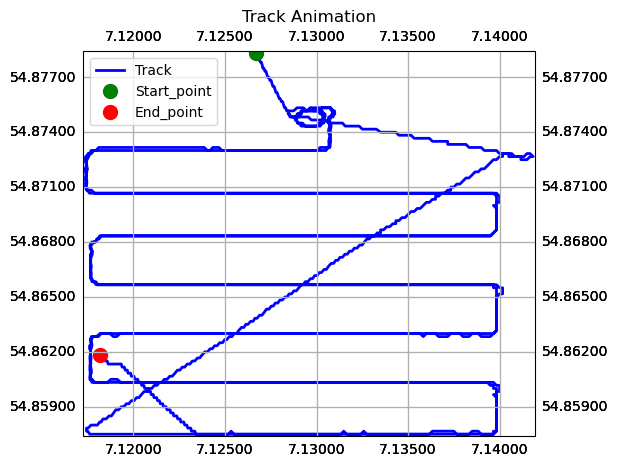

In [18]:
# ANIMATION: takes long to run

# Extract longitude and latitude
track2_lons = df['Longitude']
track2_lats = df['Latitude']

# Ensure there's at least one data point
if len(track2_lons) < 2:
    raise ValueError("Not enough data points for animation.")

# Define the format for x and y-axis ticks
formatter = mticker.FuncFormatter(lambda x, _: '{:.2f}'.format(x))

# Create figure and axis
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Initialize the plot elements
line, = ax.plot([], [], color='blue', linewidth=2, label='Track')
start_point, = ax.plot([], [], 'go', markersize=10, label='Start_point')
end_point, = ax.plot([], [], 'ro', markersize=10, label='End_point')

def init():
    ax.set_xlim(min(track2_lons) - 0.0001, max(track2_lons) + 0.0001)
    ax.set_ylim(min(track2_lats) - 0.0001, max(track2_lats) + 0.0001)
    ax.set_title('Track Animation')
    ax.legend(loc='upper left')
    gl = ax.gridlines(draw_labels=True)
    gl.xformatter = mticker.FormatStrFormatter('%.5f')
    gl.yformatter = mticker.FormatStrFormatter('%.5f')
    return line, start_point, end_point

def update(frame):
    # Ensure frame is within valid range
    if frame < len(track2_lons):
        current_lons = track2_lons[:frame+1]
        current_lats = track2_lats[:frame+1]
        line.set_data(current_lons, current_lats)
        
        if frame > 0:
            start_point.set_data(track2_lons[0], track2_lats[0])
        if frame == len(track2_lons) - 1:
            end_point.set_data(track2_lons[-1], track2_lats[-1])
    return line, start_point, end_point

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, repeat=False)
#ani = animation.FuncAnimation(fig, update, frames=60, init_func=init, blit=True, repeat=False)

# Save the animation using 'pillow' writer
try:
    ani.save('track_animation.gif', writer='pillow', fps=10)
except Exception as e:
    print(f"Error saving animation: {e}")

# Show the plot
plt.show()

In [78]:
#import os
cwd = os.getcwd()
cwd

'C:\\Users\\piago\\Documents\\Uni\\5_Semester\\Hiwi'

In [5]:
# Filter columns that start with "CTD_Salinity"
filtered_columns = [col for col in df.columns if col.startswith('CTD_Salinity_abs')]

# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    mode = 'lines+markers' if i % 2 == 0 else 'markers'
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='lines',
        #mode=mode,
        marker = dict(size=2),
        name=col[-12:-6]
    ))

# Customize the layout
fig.update_layout(
    title='Halobates Salinity',
    xaxis_title='Time',
    yaxis_title='Salinity',
    #legend_title='Legend',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure
    legend=dict(
        #x=0.02,  # Set the x position of the legend
        #y=0.98,  # Set the y position of the legend
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=8,
            color='black'
        ),
        #bgcolor='LightSteelBlue',
        #bordercolor='Black',
        #borderwidth=1
    ),
    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


# Set x and y axis limits
fig.update_xaxes(range=[df.index.min(), df.index.max()],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14) 
) #ncrease y-axis tick font size# Adjust as needed

#fig.update_yaxes(range=[df[filtered_columns].min().min(), df[filtered_columns].max().max()])  # Adjust as needed
fig.update_yaxes(#range=[17,18.5],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14)  # Increase y-axis tick font size
)  # Adjust as needed


# Show the plot
fig.show()

In [6]:
# Filter columns that start with "Campbell_Windspeed"
filtered_columns = [col for col in df.columns if col.startswith('Campbell_WindSpeed')]


# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    mode = 'lines+markers' if i % 2 == 0 else 'markers'
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='lines',
        #mode=mode,
        marker = dict(size=2),
        name=col[-12:-6]
    ))

# Customize the layout
fig.update_layout(
    title='Campbel Windspeed',
    xaxis_title='Time',
    yaxis_title='Wind_Speed',
    #legend_title='Legend',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure
    legend=dict(
        #x=0.02,  # Set the x position of the legend
        #y=0.98,  # Set the y position of the legend
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=8,
            color='black'
        ),
        #bgcolor='LightSteelBlue',
        #bordercolor='Black',
        #borderwidth=1
    ),
    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


# Set x and y axis limits
fig.update_xaxes(range=[df.index.min(), df.index.max()],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14) 
) #ncrease y-axis tick font size# Adjust as needed

#fig.update_yaxes(range=[df[filtered_columns].min().min(), df[filtered_columns].max().max()])  # Adjust as needed
fig.update_yaxes(#range=[17,18.5],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14)  # Increase y-axis tick font size
)  # Adjust as needed


# Show the plot
fig.show()

In [63]:
# Filter columns that start with "CTD_Cond"
filtered_columns = [col for col in df.columns if col.startswith('CTD_Cond')]

# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    mode = 'lines+markers' if i % 2 == 0 else 'markers'
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='lines',
        #mode=mode,
        marker = dict(size=2),
        name=col[-13:-7]
    ))

# Customize the layout
fig.update_layout(
    title='Halobates Conductivity',
    xaxis_title='Time',
    yaxis_title='Conductivity',
    #legend_title='Legend',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure
    legend=dict(
        #x=0.02,  # Set the x position of the legend
        #y=0.98,  # Set the y position of the legend
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=8,
            color='black'
        ),
        #bgcolor='LightSteelBlue',
        #bordercolor='Black',
        #borderwidth=1
    ),
    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


# Set x and y axis limits
fig.update_xaxes(range=[df.index.min(), df.index.max()],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14) 
) #ncrease y-axis tick font size# Adjust as needed

#fig.update_yaxes(range=[df[filtered_columns].min().min(), df[filtered_columns].max().max()])  # Adjust as needed
fig.update_yaxes(#range=[17,18.5],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14)  # Increase y-axis tick font size
)  # Adjust as needed


# Show the plot
fig.show()

In [65]:
# Filter columns that start with "CTD_pH"
filtered_columns = [col for col in df.columns if col.startswith('CTD_pH')]

# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    mode = 'lines+markers' if i % 2 == 0 else 'markers'
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='lines',
        #mode=mode,
        marker = dict(size=2),
        name=col[-12:-6]
    ))

# Customize the layout
fig.update_layout(
    title='Halobates PH',
    xaxis_title='Time',
    yaxis_title='PH',
    #legend_title='Legend',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure
    legend=dict(
        #x=0.02,  # Set the x position of the legend
        #y=0.98,  # Set the y position of the legend
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=8,
            color='black'
        ),
        #bgcolor='LightSteelBlue',
        #bordercolor='Black',
        #borderwidth=1
    ),
    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


# Set x and y axis limits
fig.update_xaxes(range=[df.index.min(), df.index.max()],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14) 
) #ncrease y-axis tick font size# Adjust as needed

#fig.update_yaxes(range=[df[filtered_columns].min().min(), df[filtered_columns].max().max()])  # Adjust as needed
fig.update_yaxes(#range=[17,18.5],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14)  # Increase y-axis tick font size
)  # Adjust as needed


# Show the plot
fig.show()

In [12]:
# Filter columns that start with "CTD_Temp"
filtered_columns = [col for col in df.columns if col.startswith('CTD_Temp')]

# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    mode = 'lines+markers' if i % 2 == 0 else 'markers'
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='lines',
        #mode=mode,
        marker = dict(size=2),
        name=col[-10:]
    ))

# Customize the layout
fig.update_layout(
    title='Halobates Temperature',
    xaxis_title='Time',
    yaxis_title='Temperature',
    #legend_title='Legend',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure
    legend=dict(
        #x=0.02,  # Set the x position of the legend
        #y=0.98,  # Set the y position of the legend
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=8,
            color='black'
        ),
        #bgcolor='LightSteelBlue',
        #bordercolor='Black',
        #borderwidth=1
    ),
    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


# Set x and y axis limits
fig.update_xaxes(range=[df.index.min(), df.index.max()],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14) 
) #ncrease y-axis tick font size# Adjust as needed

#fig.update_yaxes(range=[df[filtered_columns].min().min(), df[filtered_columns].max().max()])  # Adjust as needed
fig.update_yaxes(#range=[17,18.5],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14)  # Increase y-axis tick font size
)  # Adjust as needed

# Show the plot
fig.show()

plt.savefig('C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Plots/Temps_20230309.png',dpi=600)

<Figure size 640x480 with 0 Axes>

In [5]:
# Filter columns that start with "CTD_pH"
filtered_columns = [col for col in df.columns if col.startswith('RBR_Temp')]


# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    mode = 'lines+markers' if i % 2 == 0 else 'markers'
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='lines',
        #mode=mode,
        marker = dict(size=2),
        name=col[-10:]
    ))

# Customize the layout
fig.update_layout(
    title='RBR Temperature',
    xaxis_title='Time',
    yaxis_title='Temperature',
    #legend_title='Legend',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure
    legend=dict(
        #x=0.02,  # Set the x position of the legend
        #y=0.98,  # Set the y position of the legend
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=8,
            color='black'
        ),
        #bgcolor='LightSteelBlue',
        #bordercolor='Black',
        #borderwidth=1
    ),
    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


# Set x and y axis limits
fig.update_xaxes(range=[df.index.min(), df.index.max()],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14) 
) #ncrease y-axis tick font size# Adjust as needed

#fig.update_yaxes(range=[df[filtered_columns].min().min(), df[filtered_columns].max().max()])  # Adjust as needed
fig.update_yaxes(#range=[17,18.5],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14)  # Increase y-axis tick font size
)  # Adjust as needed


# Show the plot
fig.show()

In [6]:
# Filter columns that start with "Campbell_Air"
filtered_columns = [col for col in df.columns if col.startswith('Campbell_Air')]


# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    mode = 'lines+markers' if i % 2 == 0 else 'markers'
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='lines',
        #mode=mode,
        marker = dict(size=2),
        name=col[-12:-6]
    ))

# Customize the layout
fig.update_layout(
    title='Air Temperature',
    xaxis_title='Time',
    yaxis_title='Temperature',
    #legend_title='Legend',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure
    legend=dict(
        #x=0.02,  # Set the x position of the legend
        #y=0.98,  # Set the y position of the legend
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=8,
            color='black'
        ),
        #bgcolor='LightSteelBlue',
        #bordercolor='Black',
        #borderwidth=1
    ),
    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


# Set x and y axis limits
fig.update_xaxes(range=[df.index.min(), df.index.max()],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14) 
) #ncrease y-axis tick font size# Adjust as needed

#fig.update_yaxes(range=[df[filtered_columns].min().min(), df[filtered_columns].max().max()])  # Adjust as needed
fig.update_yaxes(#range=[17,18.5],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14)  # Increase y-axis tick font size
)  # Adjust as needed


# Show the plot
fig.show()

In [68]:
# Filter columns that start with "CTD_pH"
filtered_columns = [col for col in df.columns if col.startswith('RBR_Pres')]


# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    mode = 'lines+markers' if i % 2 == 0 else 'markers'
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='lines',
        #mode=mode,
        marker = dict(size=2),
        name=col[-12:-6]
    ))

# Customize the layout
fig.update_layout(
    title='RBR Pressure',
    xaxis_title='Time',
    yaxis_title='Pressure',
    #legend_title='Legend',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure
    legend=dict(
        #x=0.02,  # Set the x position of the legend
        #y=0.98,  # Set the y position of the legend
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=8,
            color='black'
        ),
        #bgcolor='LightSteelBlue',
        #bordercolor='Black',
        #borderwidth=1
    ),
    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


# Set x and y axis limits
fig.update_xaxes(range=[df.index.min(), df.index.max()],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14) 
) #ncrease y-axis tick font size# Adjust as needed

#fig.update_yaxes(range=[df[filtered_columns].min().min(), df[filtered_columns].max().max()])  # Adjust as needed
fig.update_yaxes(#range=[17,18.5],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14)  # Increase y-axis tick font size
)  # Adjust as needed


# Show the plot
fig.show()

In [7]:
var1 = 'Campbell_WindSpeed'
var2 = 'CTD_Temp_SML'
# Compute the correlation between the two variables
correlation = df[var1].corr(df[var2])

print(f'The correlation between {var1} and {var2} is: {correlation:.2f}')

var1 = 'Campbell_Wind_Direction_True'
var2 = 'CTD_Temp_SML'
# Compute the correlation between the two variables
correlation = df[var1].corr(df[var2])

print(f'The correlation between {var1} and {var2} is: {correlation:.2f}')

var1 = 'CTD_Temperature_100cm_[°C]'
var2 = 'CTD_Temp_SML'
# Compute the correlation between the two variables
correlation = df[var1].corr(df[var2])

print(f'The correlation between {var1} and {var2} is: {correlation:.2f}')



The correlation between Campbell_WindSpeed and CTD_Temp_SML is: -0.08
The correlation between Campbell_Wind_Direction_True and CTD_Temp_SML is: 0.67
The correlation between CTD_Temperature_100cm_[°C] and CTD_Temp_SML is: 0.99


In [16]:
df['CTD_Temperature_100cm_[°C]']

Date_Time
2024-07-22 10:28:00    18.2017
2024-07-22 10:28:10    18.2186
2024-07-22 10:28:20    18.2236
2024-07-22 10:28:30    18.2260
2024-07-22 10:28:40    18.2227
                        ...   
2024-07-22 17:24:20    19.0510
2024-07-22 17:24:30    19.0468
2024-07-22 17:24:40    19.0430
2024-07-22 17:24:50    19.0390
2024-07-22 17:25:00    19.0349
Name: CTD_Temperature_100cm_[°C], Length: 2503, dtype: float64

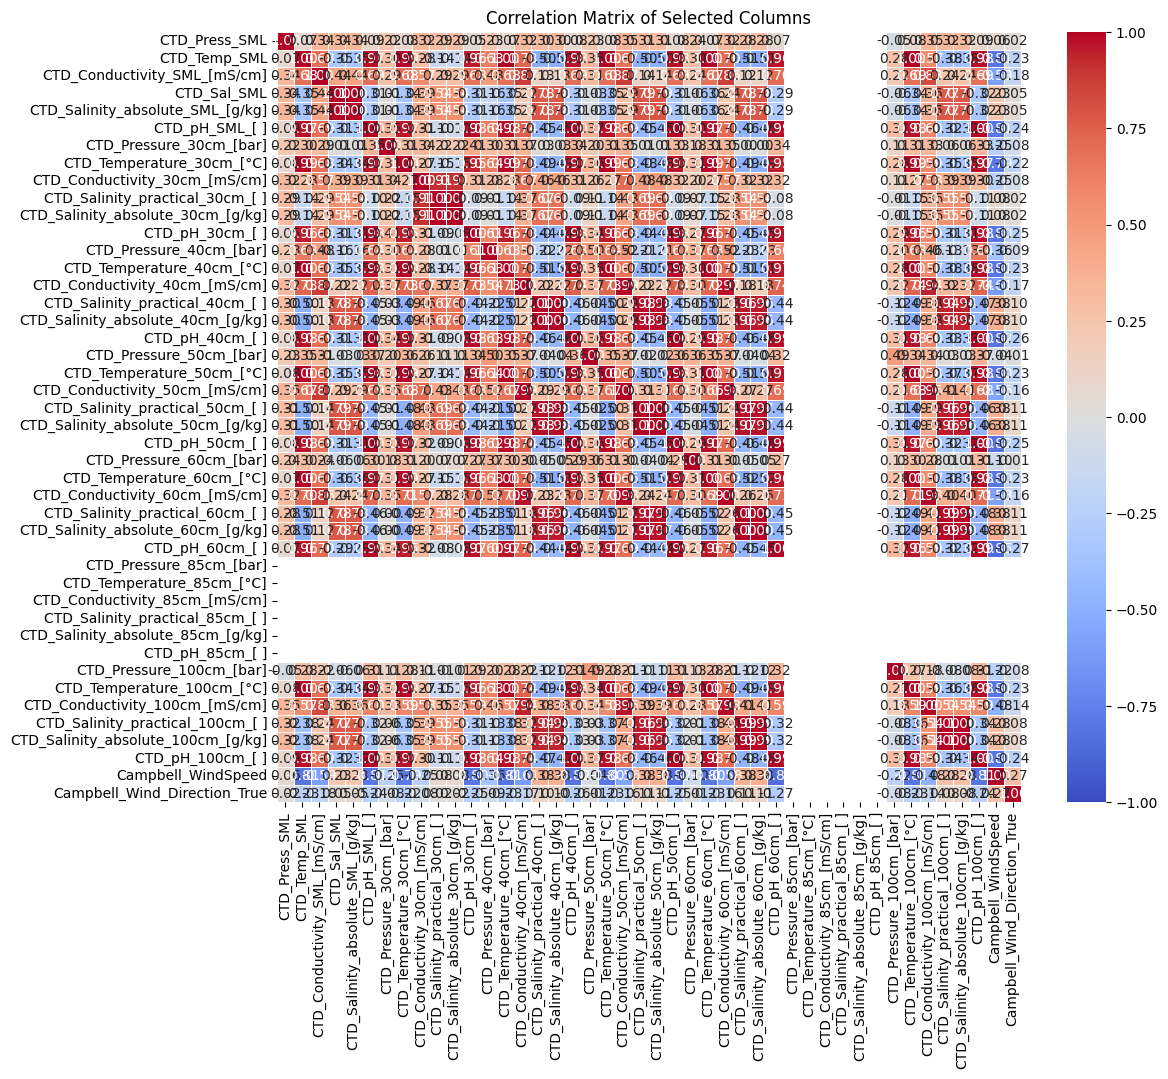

In [17]:
# Filter columns that start with 'CTD' and add specific columns
filtered_columns = [col for col in df.columns if col.startswith('CTD')] + ['Campbell_WindSpeed', 'Campbell_Wind_Direction_True']

# Select the subset of the DataFrame
df_subset = df[filtered_columns]

# Compute the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()

In [18]:
df.head()
start = "CTD_Temp"
#t_end = 'Temp'
s_start = 'CTD_Sal_abs'

# Filter the columns that start with the specified prefix
filtered_columns = [col for col in df.columns if col.startswith(start)]

# Piece together the values from the filtered columns and calculate the average
df['Temp_Avg'] = df[filtered_columns].sum(axis=1) / len(filtered_columns)

# Filter the columns that start with the specified prefix
filtered_columns = [col for col in df.columns if col.startswith(s_start)]

# Piece together the values from the filtered columns and calculate the average
df['Sal_Avg'] = df[filtered_columns].sum(axis=1) / len(filtered_columns)

filtered_columns = [col for col in df.columns if col.startswith('RBR_Temp')]

# Piece together the values from the filtered columns and calculate the average
df['RBR_Avg'] = df[filtered_columns].sum(axis=1) / len(filtered_columns)


# Define the condition for dropping the rows
#condition = df['Idro_Temp_Avg'] > 6.3

# Drop the rows that meet the condition
#df = df.drop(df[condition].index)

#df_T1=df['2023-03-20-08:27:00':'2023-03-20-10:30:00']
#df_T2=df['2023-03-20-12:20:00':'2023-03-20-14:25:00']

#### Salinity Spatial SML

Text(0.5, 1.0, 'Salinity_Spatial_SML')

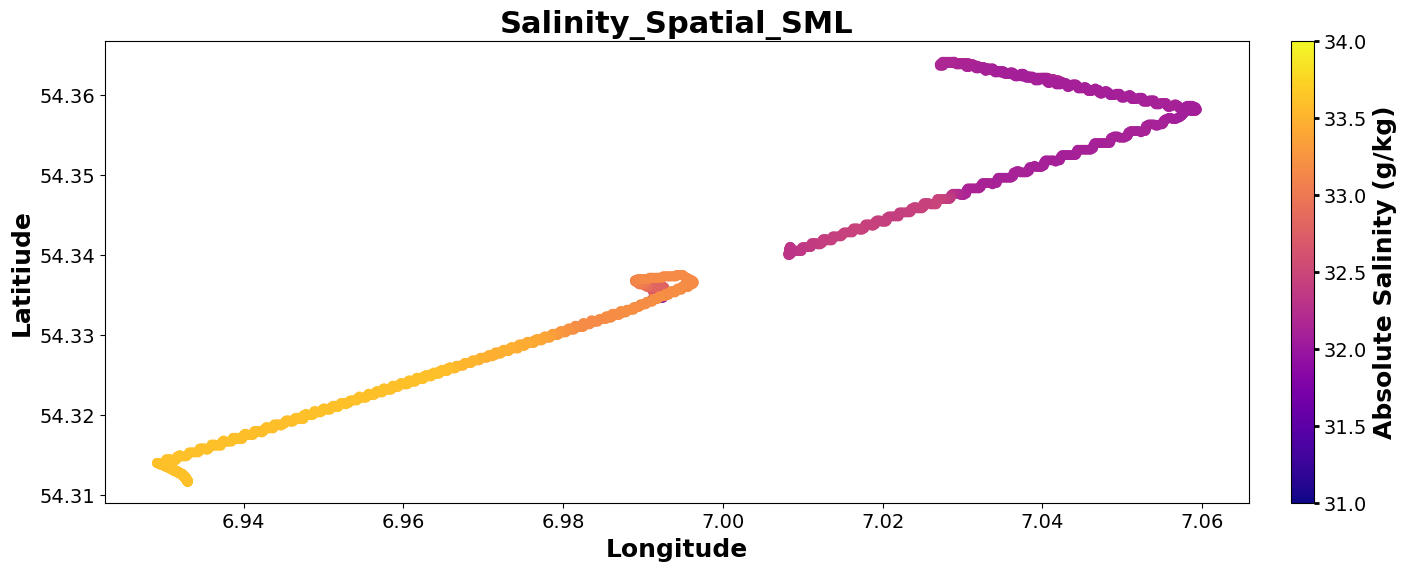

In [8]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.scatter(df.Longitude,df.Latitude, c = df['CTD_Salinity_absolute_SML_[g/kg]'], cmap = 'plasma', label = 'End_point', vmin = 31, vmax = 34)
cbar = plt.colorbar(cmap='plasma', pad=0.03)
cbar.set_label('Absolute Salinity (g/kg)', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Salinity_Spatial_SML',fontsize=22, fontweight='bold')
#plot_name = 'Salinity_Spatial'
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/Salinity_SML_scatter.png',dpi=600)

Text(0.5, 1.0, 'Salinity_Spatial_100cm')

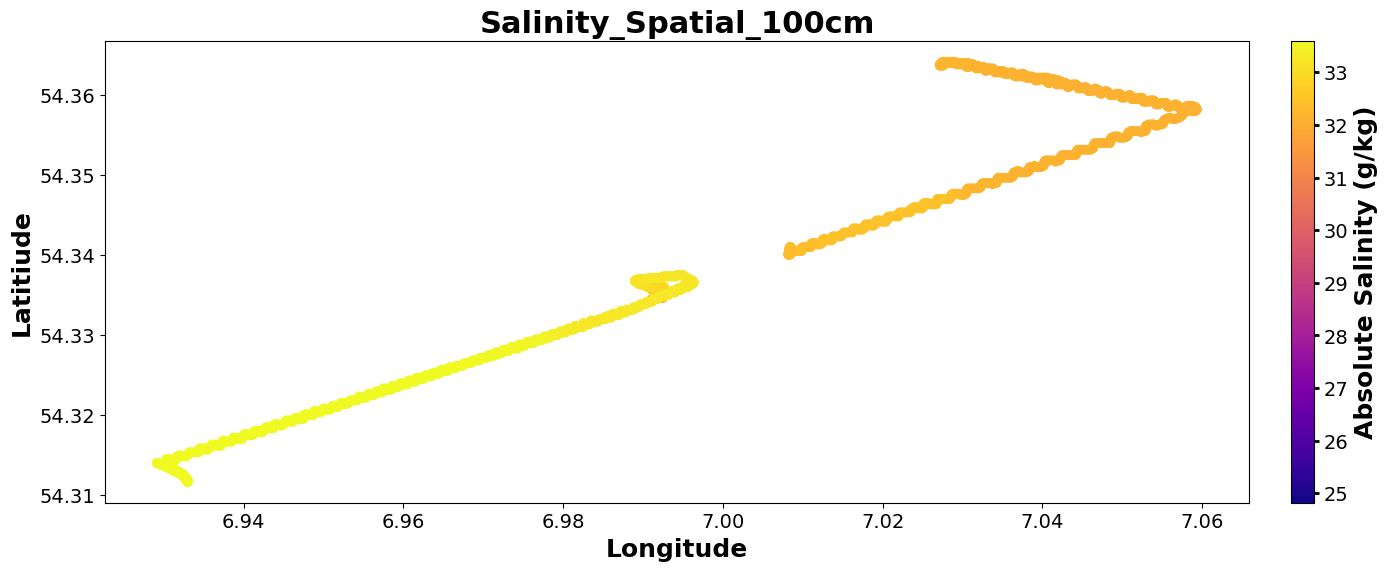

In [9]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.scatter(df.Longitude,df.Latitude, c = df['CTD_Salinity_absolute_100cm_[g/kg]'], cmap = 'plasma')
#plt.scatter(df.Longitude,df.Latitude, c = df.CTD_Sal_abs_SML, cmap = 'Greens', marker = 's')

cbar = plt.colorbar(cmap='plasma', pad=0.03)
cbar.set_label('Absolute Salinity (g/kg)', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Salinity_Spatial_100cm',fontsize=22, fontweight='bold')
#plot_name = 'Salinity_Spatial'
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/Salinity_Bulk_ESA_Conf.png',dpi=600)

Text(0.5, 1.0, 'Salinity_Spatial')

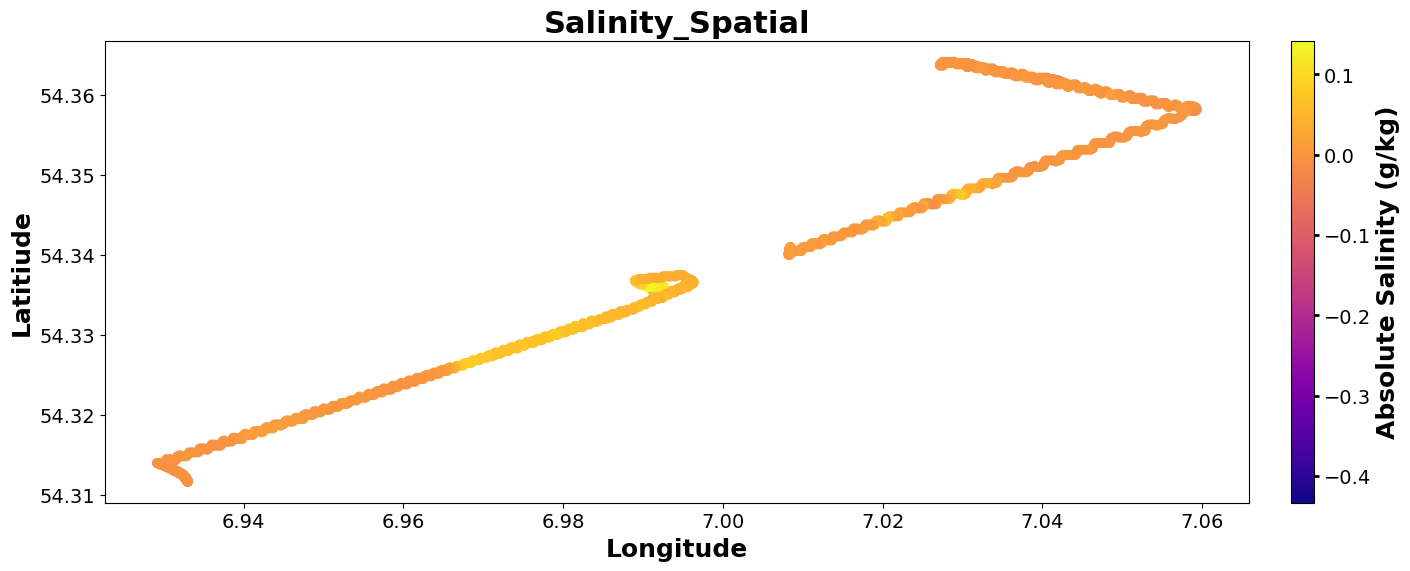

In [12]:
df['Sal_diff'] =  df['CTD_Salinity_absolute_100cm_[g/kg]'] - df['CTD_Salinity_absolute_SML_[g/kg]']
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.scatter(df.Longitude,df.Latitude, c = df.Sal_diff, cmap = 'plasma', label = 'End_point')
cbar = plt.colorbar(cmap='plasma', pad=0.03)
cbar.set_label('Absolute Salinity (g/kg)', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Salinity_Spatial',fontsize=22, fontweight='bold')
#plot_name = 'Salinity_Spatial'
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/Sal_Diff_scatter.png',dpi=600)

In [21]:
df.columns

Index(['Latitude', 'Longitude', 'RECORD', 'Campbell_Barometric_Pressure',
       'Campbell_Relative_Humidity', 'Campbell_Air_Temperature',
       'Campbell_Dew_Point', 'Campbell_WindSpeed',
       'Campbell_Wind_Direction_True', 'Campbell_Precipitation_Total',
       ...
       'Quality_Thies_Temperature_2_AVG', 'Quality_Thies_Temperature_3_AVG',
       'Quality_Thies_Temperature_4_AVG', 'Quality_Thies_Temperature_5_AVG',
       'Quality_Thies_Temperature_CUS_AVG',
       'Quality_Thies_Relative_Humidity_2_AVG',
       'Quality_Thies_Relative_Humidity_3_AVG',
       'Quality_Thies_Relative_Humidity_4_AVG',
       'Quality_Thies_Relative_Humidity_5_AVG',
       'Quality_Thies_Relative_Humidity_CUS_AVG'],
      dtype='object', length=183)

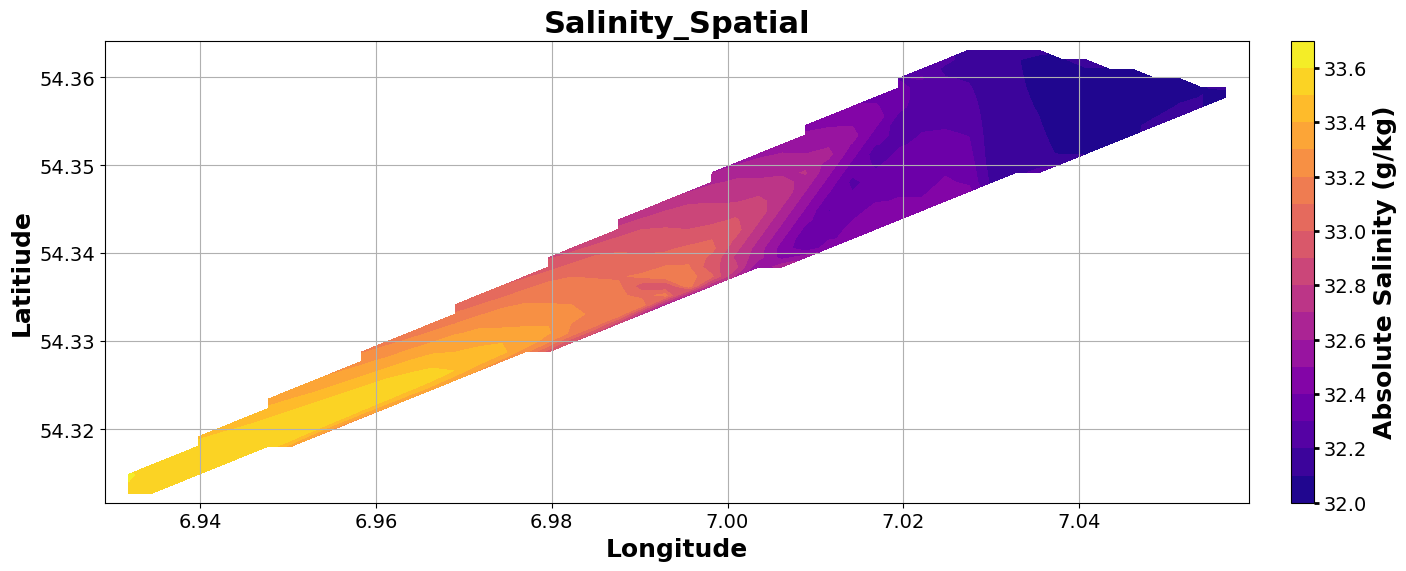

In [10]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
#x_numeric = np.sin(dept) 
df = df.dropna(subset= ['CTD_Salinity_absolute_SML_[g/kg]'])
xi = np.linspace(min(df.Longitude), max(df.Longitude))
yi = np.linspace(min(df.Latitude),max(df.Latitude))
#xi, yi = np.meshgrid(xi, yi)
#zi = griddata((x_numeric, combined_df.Depth), combined_df.T_smooth.values, (xi[None,:], yi[:,None]), method='linear')

zi = griddata((df.Longitude,df.Latitude), df['CTD_Salinity_absolute_SML_[g/kg]'], (xi[None,:], yi[:,None]), method='linear')

plt.grid()
plt.contourf(xi,yi,zi, 15,cmap='plasma')
#ax.invert_yaxis()
#plt.pcolormesh(xi, yi,zi,cmap='plasma')
#plt.scatter(xi,yi,c=zi)
#plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#plt.gca().yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
cbar = plt.colorbar(cmap='plasma', pad=0.03)
cbar.set_label('Absolute Salinity (g/kg)', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Salinity_Spatial',fontsize=22, fontweight='bold')
plot_name = 'Salinity_Spatial'
#absolute_plotname = absolute_path_to_plots / plot_name
#plt.savefig(absolute_plotname,dpi=600)
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/SML_Sal_Contour.png',dpi=600)

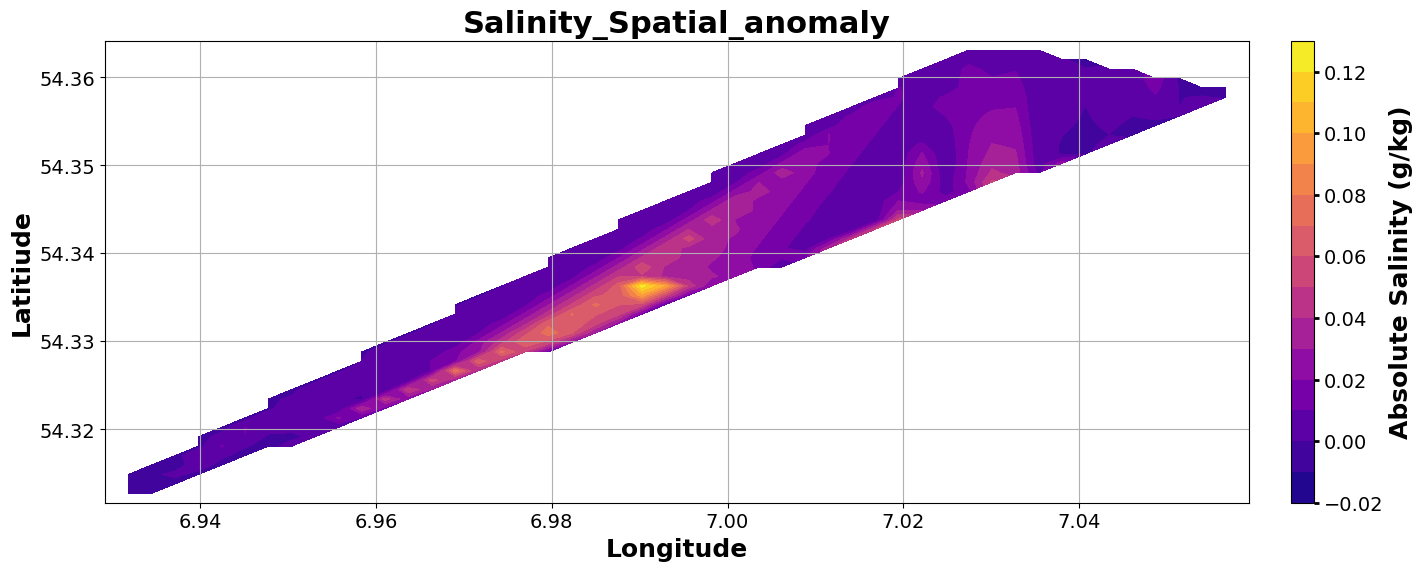

In [13]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
#x_numeric = np.sin(dept) 
xi = np.linspace(min(df.Longitude), max(df.Longitude))
yi = np.linspace(min(df.Latitude),max(df.Latitude))
#xi, yi = np.meshgrid(xi, yi)
#zi = griddata((x_numeric, combined_df.Depth), combined_df.T_smooth.values, (xi[None,:], yi[:,None]), method='linear')
zi = griddata((df.Longitude,df.Latitude), df['Sal_diff'], (xi[None,:], yi[:,None]), method='linear')
plt.grid()

plt.contourf(xi,yi,zi, 15,cmap='plasma')
#ax.invert_yaxis()
#plt.pcolormesh(xi, yi,zi,cmap='plasma')
#plt.scatter(xi,yi,c=zi)
#plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#plt.gca().yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
cbar = plt.colorbar(cmap='plasma', pad=0.03)
cbar.set_label('Absolute Salinity (g/kg)', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Salinity_Spatial_anomaly',fontsize=22, fontweight='bold')
plot_name = 'Salinity_Spatial'
#absolute_plotname = absolute_path_to_plots / plot_name
#plt.savefig(absolute_plotname,dpi=600)
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/SML_Sal_Contour.png',dpi=600)

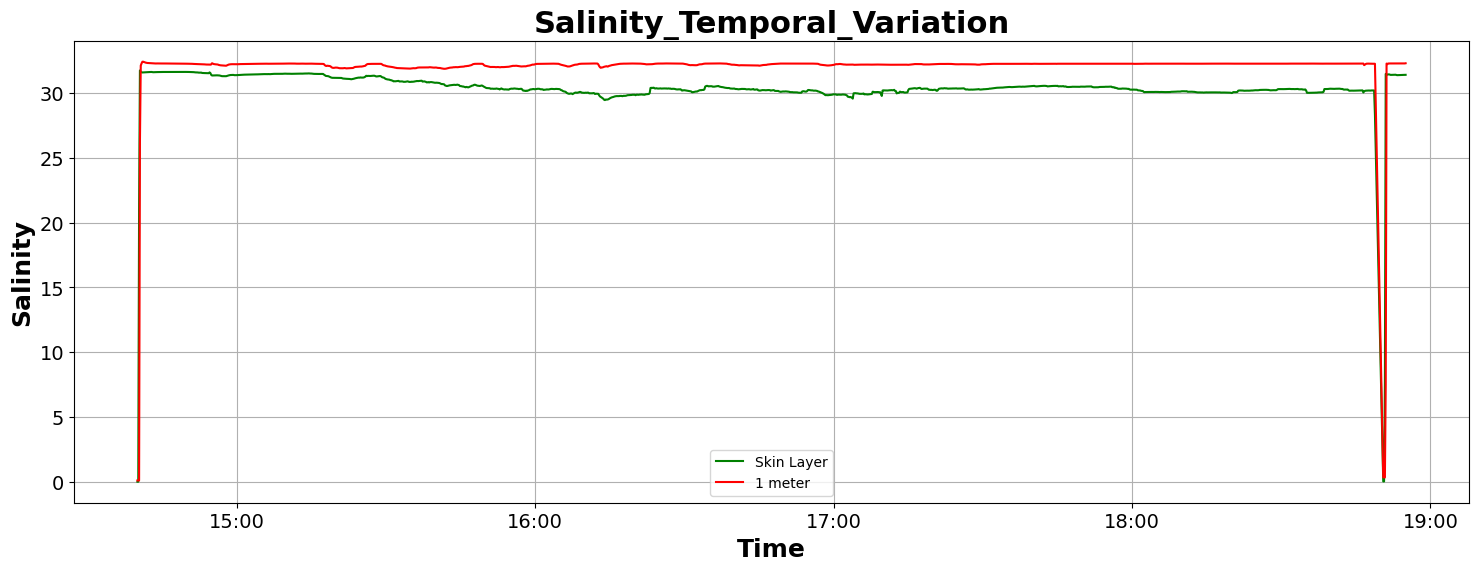

In [57]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.plot(df.index, df['CTD_Salinity_absolute_SML_[g/kg]'], color = 'green', label = 'Skin Layer')
plt.plot(df.index, df['CTD_Salinity_absolute_100cm_[g/kg]'], color = 'red', label = '1 meter')

# Set the x-axis format to display only the hour
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Time", fontsize=18, fontweight='bold')
plt.ylabel("Salinity", fontsize=18, fontweight='bold')
plt.title('Salinity_Temporal_Variation',fontsize=22, fontweight='bold')
plt.legend()
#plot_name = 'Salinity_Spatial'
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/Salinity_temporal.png',dpi=600)

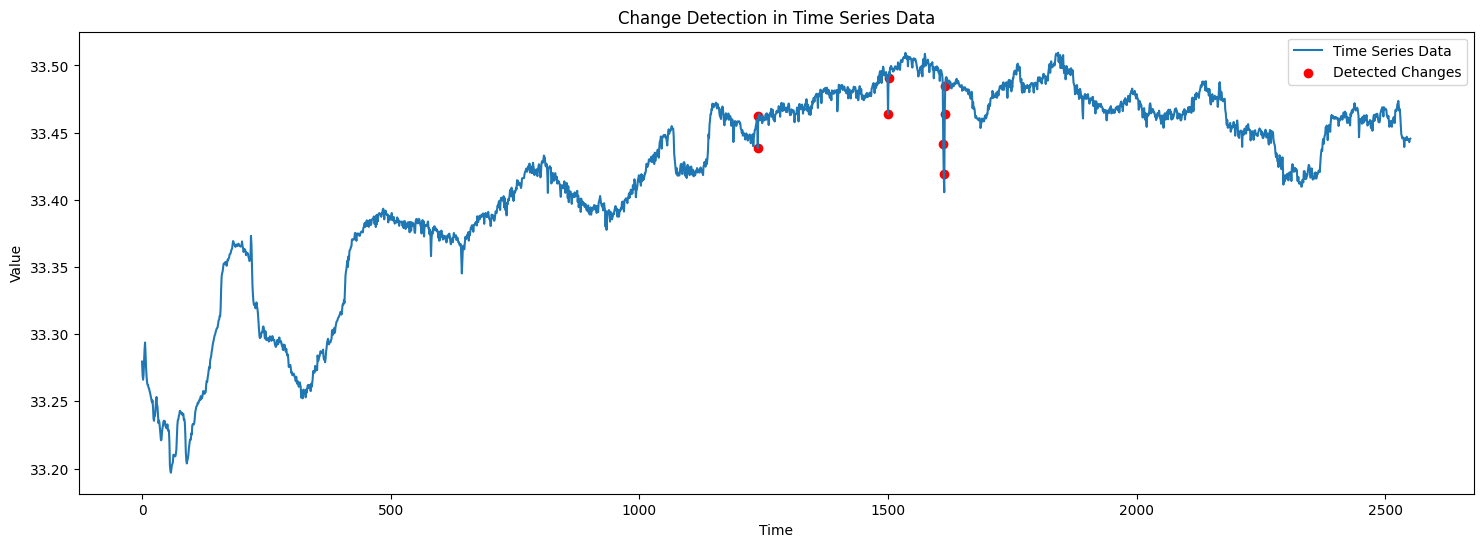

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def change_detection(time_series, threshold):
    # Calculate the difference between consecutive data points
    differences = np.diff(time_series)

    # Apply thresholding to identify significant changes
    change_indices = np.where(np.abs(differences) > threshold)[0] + 1

    return change_indices

# Example usage
time_series = df['CTD_Salinity_absolute_SML_[g/kg]']
threshold = 0.02

# Perform change detection
change_indices = change_detection(time_series, threshold)
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,

# Plotting the time series data with detected changes
plt.plot(time_series.values, label='Time Series Data')
plt.scatter(change_indices, [time_series[i] for i in change_indices], color='red', label='Detected Changes')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Change Detection in Time Series Data')
plt.legend()
plt.show()

In [17]:
import math
import pandas as pd

# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # Compute differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    a = min(1, max(0, a))  # Ensure a is within the valid range [0, 1]
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    return distance


# Calculate the total distance
total_distance = 0.0

for i in range(1, len(df)):
    lat1, lon1 = df.iloc[i - 1]['Latitude'], df.iloc[i - 1]['Longitude']
    lat2, lon2 = df.iloc[i]['Latitude'], df.iloc[i]['Longitude']
    total_distance += haversine(lat1, lon1, lat2, lon2)

print(f"Total distance covered by the drone: {total_distance:.2f} kilometers")


Total distance covered by the drone: 28.66 kilometers


In [27]:
time_series
change_indices

array([  94,   95,   96,   97,  100,  101,  102,  104,  106,  108,  113,
        114,  115,  116,  123,  124,  125,  126,  127,  129,  131,  133,
        134,  135,  136,  137,  138,  139,  140,  142,  143,  144,  145,
        147,  148,  149,  150,  158,  159,  160,  163,  164,  165,  177,
        178,  183,  184,  185,  186,  187,  188,  194,  195,  196,  214,
        215,  223,  224,  225,  229,  230,  235,  236,  237,  240,  241,
        250,  251,  252,  254,  255,  263,  264,  265,  266,  267,  273,
        274,  289,  290,  291,  292,  294,  295,  296,  298,  299,  304,
        305,  306,  307,  308,  314,  315,  324,  325,  326,  327,  328,
        329,  333,  334,  336,  337,  344,  345,  346,  347,  348,  349,
        351,  352,  353,  354,  358,  359,  362,  363,  367,  368,  369,
        370,  371,  373,  375,  376,  377,  380,  381,  382,  386,  387,
        388,  389,  392,  393,  397,  398,  402,  403,  404,  405,  409,
        410,  412,  413,  414,  415,  418,  419,  4

### Spatial T1 Average

In [18]:
#!jupyter nbconvert --to html Cruise_Summaries.ipynb --no-input

[NbConvertApp] Converting notebook Cruise_Summaries.ipynb to html
[NbConvertApp] Writing 9028989 bytes to Cruise_Summaries.html


Temperature Spacial SML

Text(0.5, 1.0, 'Temperature_Spatial_SML')

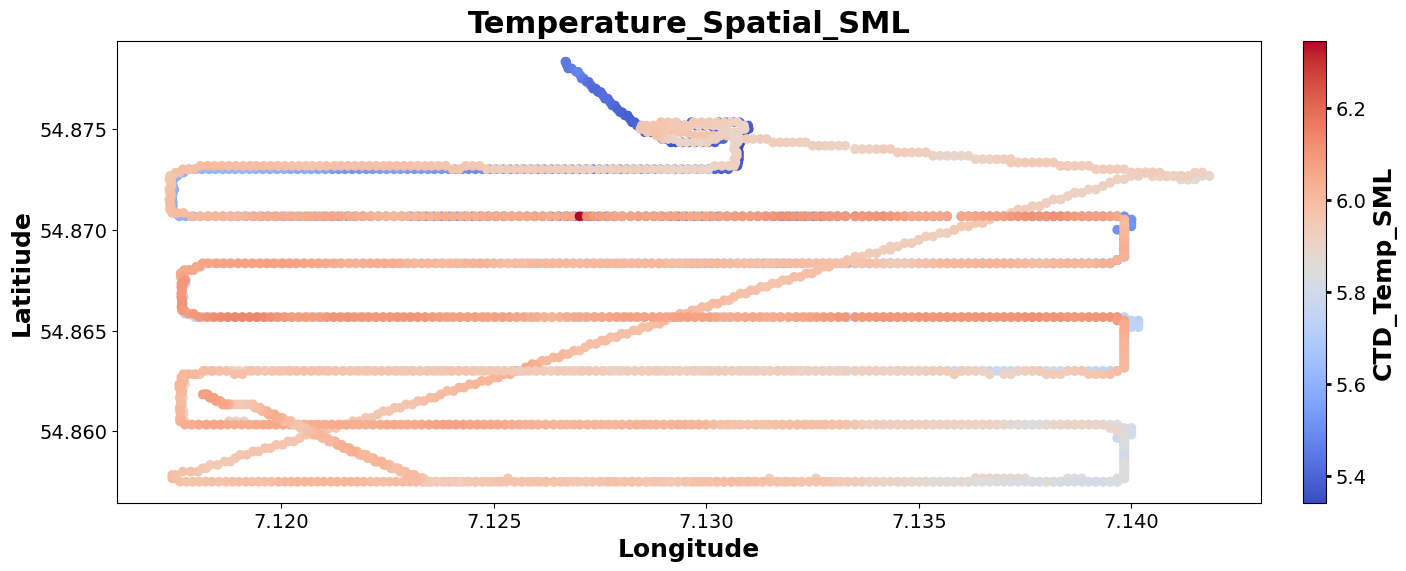

In [20]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.scatter(df.Longitude,df.Latitude, c = df['CTD_Temp_SML'], cmap = 'coolwarm', label = 'End_point')
cbar = plt.colorbar(cmap='coolwarm', pad=0.03)
cbar.set_label('CTD_Temp_SML', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Temperature_Spatial_SML',fontsize=22, fontweight='bold')
#plot_name = 'Salinity_Spatial'
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/Salinity_SML_scatter.png',dpi=600)

Text(0.5, 1.0, 'Temperature_Spatial_100cm')

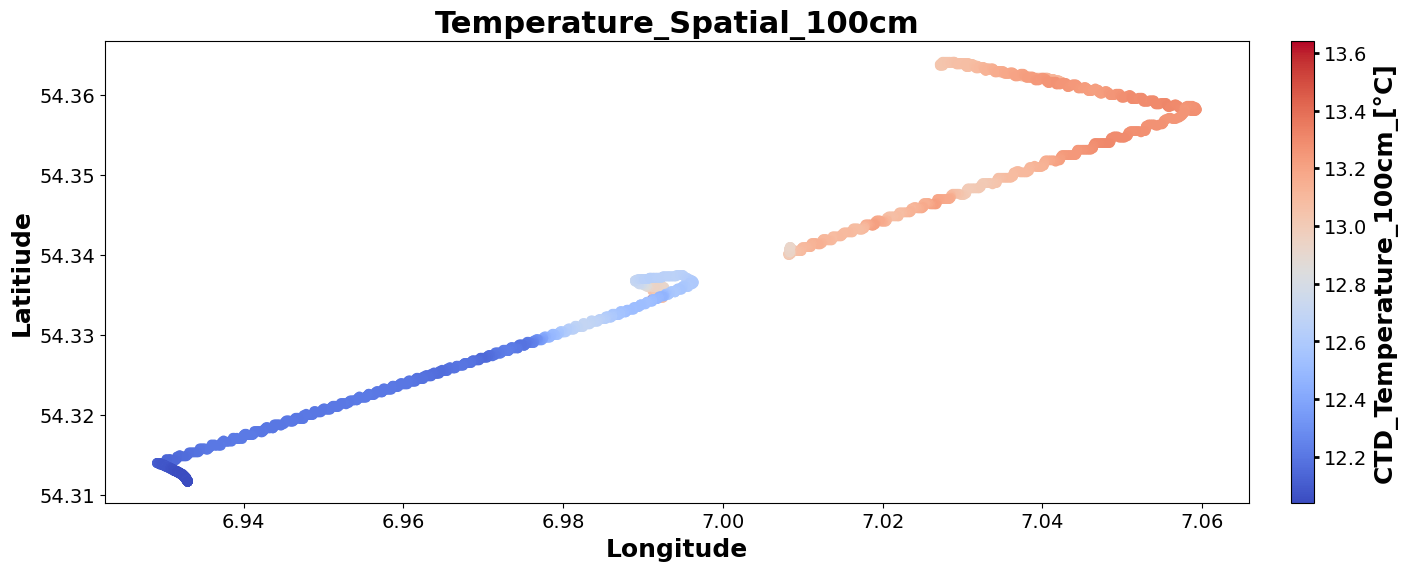

In [16]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.scatter(df.Longitude,df.Latitude, c = df['CTD_Temperature_100cm_[°C]'], cmap = 'coolwarm', label = 'End_point')
cbar = plt.colorbar(cmap='coolwarm', pad=0.03)
cbar.set_label('CTD_Temperature_100cm_[°C]', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Temperature_Spatial_100cm',fontsize=22, fontweight='bold')
#plot_name = 'Salinity_Spatial'
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/Salinity_SML_scatter.png',dpi=600)

Text(0.5, 1.0, 'Temperature_Difference_Spatial')

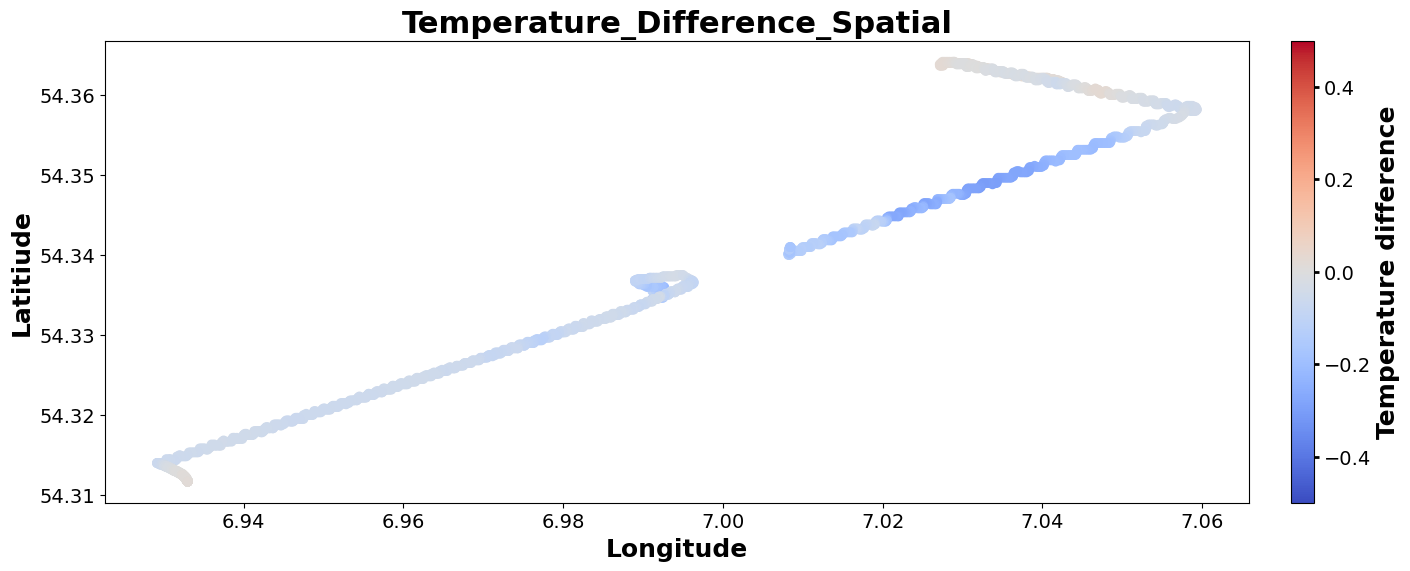

In [9]:
df['Temp_diff'] =  df['CTD_Temperature_100cm_[°C]'] - df['CTD_Temp_SML']
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.scatter(df.Longitude,df.Latitude, c = df.Temp_diff, cmap = 'coolwarm', label = 'End_point', vmin = -0.5, vmax = 0.5)
cbar = plt.colorbar(cmap='coolwarm', pad=0.03)
cbar.set_label('Temperature difference', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Temperature_Difference_Spatial',fontsize=22, fontweight='bold')
#plot_name = 'Salinity_Spatial'
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/Sal_Diff_scatter.png',dpi=600)

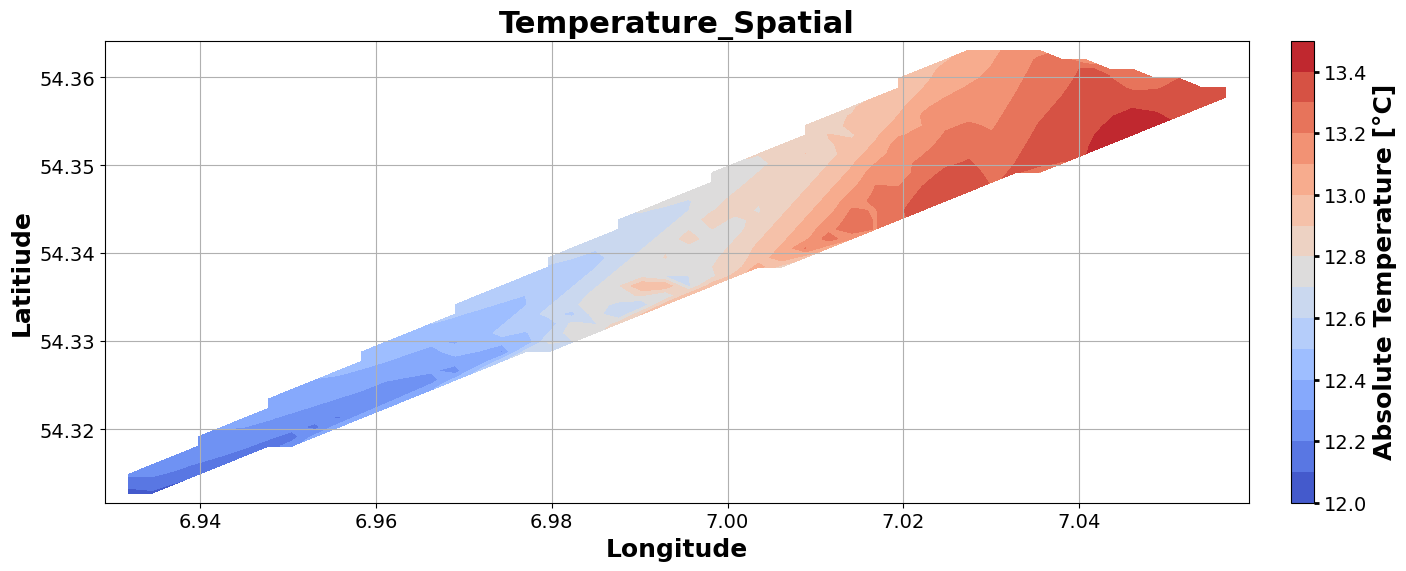

In [18]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
#x_numeric = np.sin(dept) 
df = df.dropna(subset= ['CTD_Temp_SML'])
xi = np.linspace(min(df.Longitude), max(df.Longitude))
yi = np.linspace(min(df.Latitude),max(df.Latitude))
#xi, yi = np.meshgrid(xi, yi)
#zi = griddata((x_numeric, combined_df.Depth), combined_df.T_smooth.values, (xi[None,:], yi[:,None]), method='linear')

zi = griddata((df.Longitude,df.Latitude), df['CTD_Temp_SML'], (xi[None,:], yi[:,None]), method='linear')

plt.grid()
plt.contourf(xi,yi,zi, 15,cmap='coolwarm')
#ax.invert_yaxis()
#plt.pcolormesh(xi, yi,zi,cmap='plasma')
#plt.scatter(xi,yi,c=zi)
#plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#plt.gca().yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
cbar = plt.colorbar(cmap='coolwarm', pad=0.03)
cbar.set_label('Absolute Temperature [°C]', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitude", fontsize=18, fontweight='bold')
plt.title('Temperature_Spatial',fontsize=22, fontweight='bold')
plot_name = 'Temperature_Spatial'
#absolute_plotname = absolute_path_to_plots / plot_name
#plt.savefig(absolute_plotname,dpi=600)
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/SML_Sal_Contour.png',dpi=600)

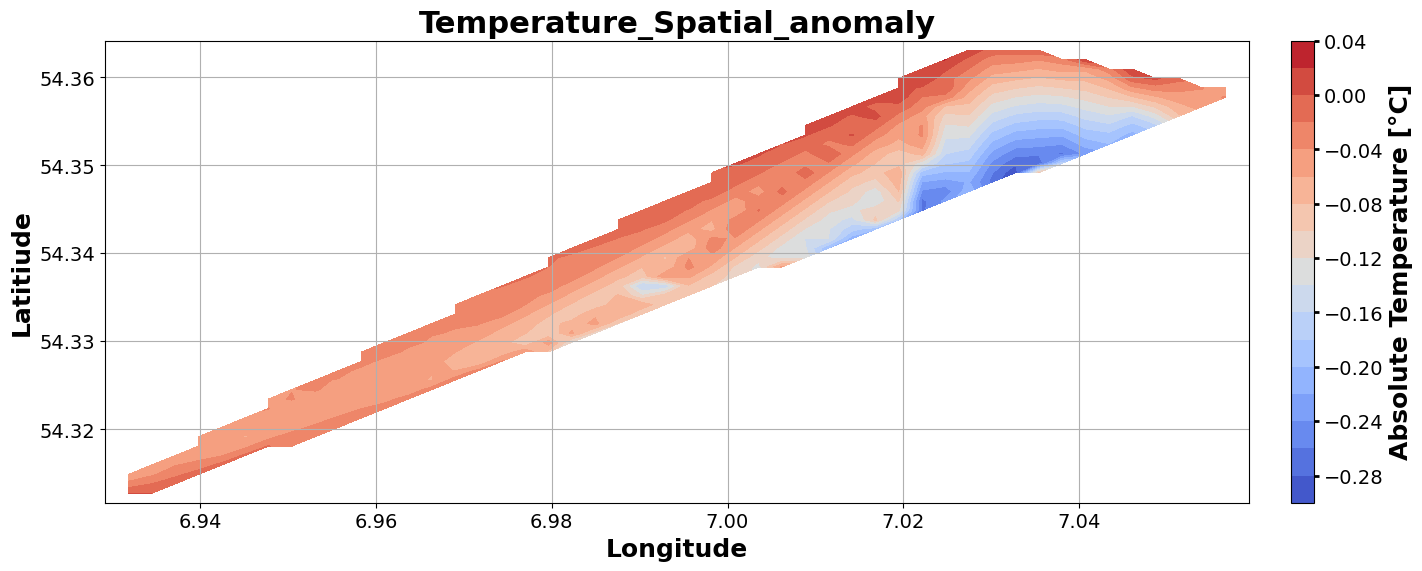

In [19]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
#x_numeric = np.sin(dept) 
xi = np.linspace(min(df.Longitude), max(df.Longitude))
yi = np.linspace(min(df.Latitude),max(df.Latitude))
#xi, yi = np.meshgrid(xi, yi)
#zi = griddata((x_numeric, combined_df.Depth), combined_df.T_smooth.values, (xi[None,:], yi[:,None]), method='linear')
zi = griddata((df.Longitude,df.Latitude), df['Temp_diff'], (xi[None,:], yi[:,None]), method='linear')
plt.grid()

plt.contourf(xi,yi,zi, 15,cmap='coolwarm')
#ax.invert_yaxis()
#plt.pcolormesh(xi, yi,zi,cmap='plasma')
#plt.scatter(xi,yi,c=zi)
#plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#plt.gca().yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
cbar = plt.colorbar(cmap='coolwarm', pad=0.03)
cbar.set_label('Absolute Temperature [°C]', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Temperature_Spatial_anomaly',fontsize=22, fontweight='bold')
plot_name = 'Temperature_Spatial'
#absolute_plotname = absolute_path_to_plots / plot_name
#plt.savefig(absolute_plotname,dpi=600)
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/SML_Sal_Contour.png',dpi=600)

In [22]:
df.columns

Index(['Event_label', 'Latitude', 'Longitude', 'RECORD',
       'Campbell_Barometric_Pressure', 'Campbell_Relative_Humidity',
       'Campbell_Air_Temperature', 'Campbell_Dew_Point', 'Campbell_WindSpeed',
       'Campbell_Wind_Direction_True',
       ...
       'Quality_Thies_Temperature_5_AVG', 'Quality_Thies_Temperature_CUS_AVG',
       'Quality_Thies_Relative_Humidity_2_AVG',
       'Quality_Thies_Relative_Humidity_3_AVG',
       'Quality_Thies_Relative_Humidity_4_AVG',
       'Quality_Thies_Relative_Humidity_5_AVG',
       'Quality_Thies_Relative_Humidity_CUS_AVG', 'Precipitation amount',
       'Sal_diff', 'Temp_diff'],
      dtype='object', length=160)

In [10]:
filtered_cols = [col for col in df.columns if col.startswith('CTD_Sal')]

In [11]:
filtered_cols

['CTD_Sal_SML',
 'CTD_Salinity_absolute_SML_[g/kg]',
 'CTD_Salinity_practical_30cm_[ ]',
 'CTD_Salinity_absolute_30cm_[g/kg]',
 'CTD_Salinity_practical_40cm_[ ]',
 'CTD_Salinity_absolute_40cm_[g/kg]',
 'CTD_Salinity_practical_100cm_[ ]',
 'CTD_Salinity_absolute_100cm_[g/kg]']

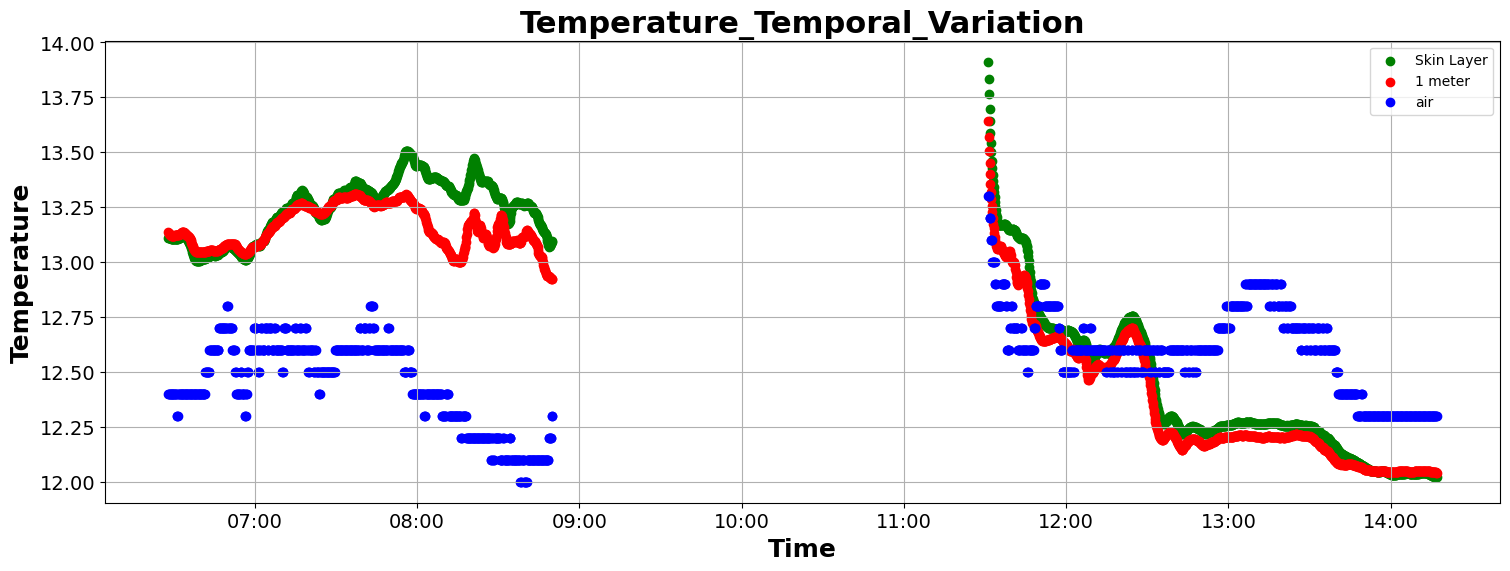

In [13]:
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.scatter(df.index, df['CTD_Temp_SML'], color = 'green', label = 'Skin Layer')
plt.scatter(df.index, df['CTD_Temperature_100cm_[°C]'], color = 'red', label = '1 meter')
plt.scatter(df.index, df['Campbell_Air_Temperature'], color = 'blue', label = 'air')
#plt.scatter(df.index, df['CTD_Sal_SML'])

# Set the x-axis format to display only the hour
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.ylim(0.7,10.3)
#[plt.axhline(y=i, color='g', linestyle = '-') for i in dep_lines]
#[plt.axhline(y=i, color='w', linestyle = '-') for i in dep_lines_SnS]
plt.xlabel("Time", fontsize=18, fontweight='bold')
plt.ylabel("Temperature", fontsize=18, fontweight='bold')
plt.title('Temperature_Temporal_Variation',fontsize=22, fontweight='bold')
plt.legend()
#plot_name = 'Salinity_Spatial'
#plt.savefig('C:/Users/Samuel Mintah Ayim/OneDrive - Carl von Ossietzky Universität Oldenburg/Documents/Projects/Front_Analysis/Salinity_temporal.png',dpi=600)